## ⚙️ Configuración del Entorno

**Entorno Virtual:** Este proyecto usa un entorno virtual `.venv` con las dependencias instaladas.

**Para ejecutar este notebook:**
1. Asegúrate de que VS Code esté usando el intérprete correcto:
   - Abre el Command Palette (`Cmd+Shift+P`)
   - Busca **"Python: Select Interpreter"**
   - Selecciona: `.venv/bin/python` (Python 3.13.2)

2. Selecciona el kernel correcto en el notebook:
   - Click en el selector de kernel (arriba a la derecha)
   - Selecciona el kernel **"Python 3.13 (Lab3 Finanzas)"**

**Paquetes instalados:**
- pandas 2.3.3
- numpy 2.3.4
- matplotlib 3.10.7
- seaborn 0.13.2
- openpyxl 3.1.5 (para leer archivos Excel)

---

# Preparar Datos

## Importar Datos

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

Los datos principales utilizados para el análisis de portafolios de media-varianza son estimaciones del retorno y el riesgo de los activos involucrados. Suponiendo que los retornos en exceso de los activos se distribuyen de manera normal, necesitamos estimar los parámetros de la distribución subyacente.

Usaremos los datos de RiskAmerica

In [17]:
df_ts = pd.read_excel('IndicesHistoricosValor.xlsx')
df_ts['Fecha'] = pd.to_datetime(df_ts['Fecha'])
df_ts = df_ts.sort_values(by='Fecha', ascending=True)
df_ts.set_index('Fecha', inplace=True)
df_ts.head()

/Users/agustinvillagra/Desktop/Universidad/Semestre 8/Finanzas/Lab 3/.venv/lib/python3.13/site-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,AFPCAPITAL Cierre Ix,CEMENTOS Cierre Ix,CONCHATORO Cierre Ix,CTISA Cierre Ix,ENERSIS-AM Cierre Ix,INVERCAP Cierre Ix,MELON Cierre Ix,OXIQUIM Cierre Ix,SONDA Cierre Ix,TATTERSALL Cierre Ix
Fecha,,,,,,,,,,
2020-10-15,100.0,100.0,100.0000,100,100.0000,100.0000,100.0,100.0,100.0000,100
2020-10-16,100.0,100.0,99.3780,100,102.5204,100.0000,100.0,100.0,99.8830,100
2020-10-19,100.0,100.0,97.8819,100,103.2419,98.9818,100.0,100.0,97.3585,100
2020-10-20,100.0,100.0,98.8031,100,104.5984,98.9818,100.0,100.0,96.5094,100
2020-10-21,100.0,100.0,99.1024,100,108.0808,99.5455,100.0,100.0,100.2491,100


In [18]:
# Obtener el primer día hábil de cada mes
df_ts = df_ts.resample('BMS').first()

# Mostrar los primeros resultados
df_ts.head()

,AFPCAPITAL Cierre Ix,CEMENTOS Cierre Ix,CONCHATORO Cierre Ix,CTISA Cierre Ix,ENERSIS-AM Cierre Ix,INVERCAP Cierre Ix,MELON Cierre Ix,OXIQUIM Cierre Ix,SONDA Cierre Ix,TATTERSALL Cierre Ix
Fecha,,,,,,,,,,
2020-10-01,100.0000,100.0000,100.0000,100,100.0000,100.0000,100.0,100.0000,100.0000,100
2020-11-02,100.0000,98.9361,99.6063,100,98.1241,98.0045,100.0,108.3333,94.0528,100
2020-12-01,90.9091,98.6019,102.3701,100,109.0909,99.3305,100.0,108.3333,93.7736,100
2021-01-01,102.0167,102.4986,97.6432,100,111.5921,126.2395,90.0,119.1667,82.6396,100
2021-02-01,102.0167,106.0380,92.1612,100,108.8779,124.9964,90.0,135.6333,78.3019,100


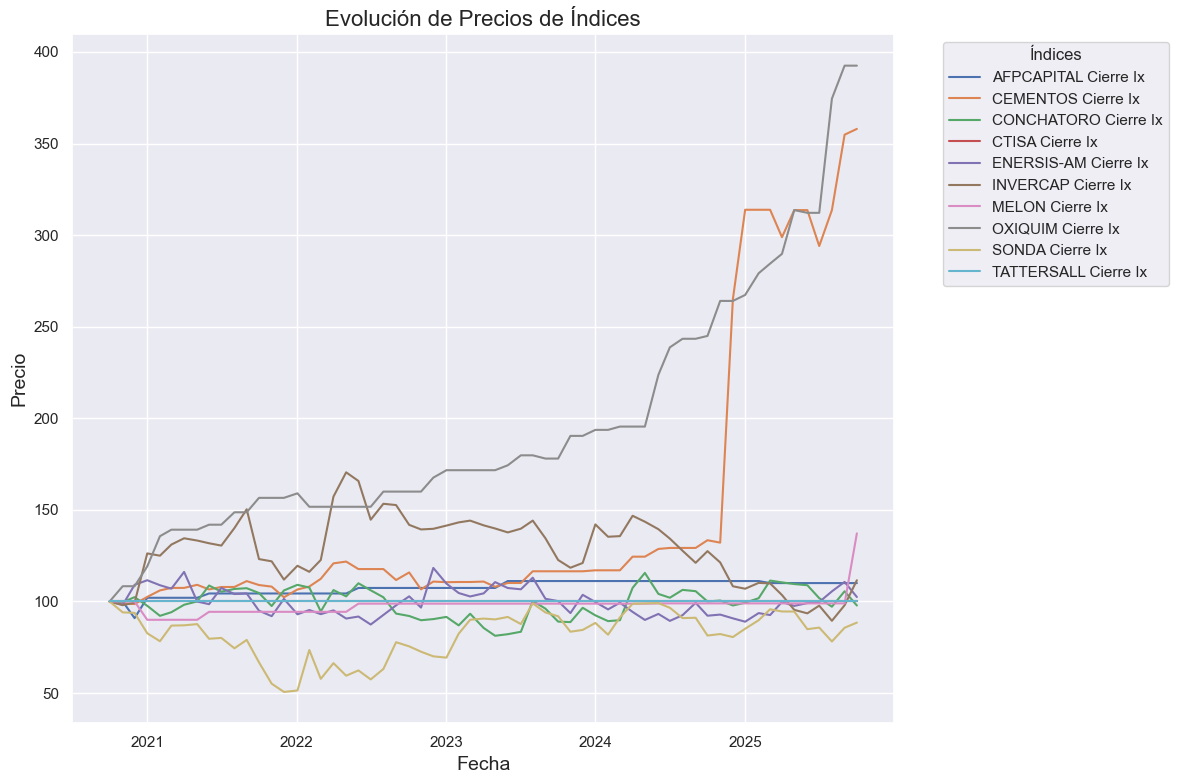

In [9]:
# Graficar la evolución de precios para todos los índices
plt.figure(figsize=(12, 8))

# Graficar todas las columnas (activos)
for column in df_ts.columns:
    plt.plot(df_ts.index, df_ts[column], label=column)

# Añadir título y etiquetas
plt.title('Evolución de Precios de Índices', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Precio', fontsize=14)
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

A continuación, convertimos los precios de cierre absolutos en cambios relativos ("rendimientos excedentes"), en unidades de porcentaje. Utilizamos la función pct_change de Pandas para calcular todos los ratios, lo que da como resultado una fila inicial que contiene NaN, la cual limpiamos simplemente eliminándola. Dependiendo del contexto, puede ser más significativo usar rendimientos log-normales en lugar de los rendimientos utilizados en este laboratorio.

In [19]:
df_r = df_ts.pct_change().iloc[1:] * 100
df_r.head()

,AFPCAPITAL Cierre Ix,CEMENTOS Cierre Ix,CONCHATORO Cierre Ix,CTISA Cierre Ix,ENERSIS-AM Cierre Ix,INVERCAP Cierre Ix,MELON Cierre Ix,OXIQUIM Cierre Ix,SONDA Cierre Ix,TATTERSALL Cierre Ix
Fecha,,,,,,,,,,
2020-11-02,0.000000,-1.063900,-0.393700,0.0,-1.875900,-1.995500,0.0,8.333300,-5.947200,0.0
2020-12-01,-9.090900,-0.337794,2.774724,0.0,11.176459,1.352999,0.0,0.000000,-0.296855,0.0
2021-01-01,12.218359,3.951952,-4.617462,0.0,2.292767,27.090370,-10.0,10.000065,-11.873278,0.0
2021-02-01,0.000000,3.453120,-5.614318,0.0,-2.432251,-0.984716,0.0,13.818122,-5.248936,0.0
2021-03-01,0.000000,1.297648,2.155137,0.0,-1.724409,4.865100,0.0,2.622955,10.901140,0.0


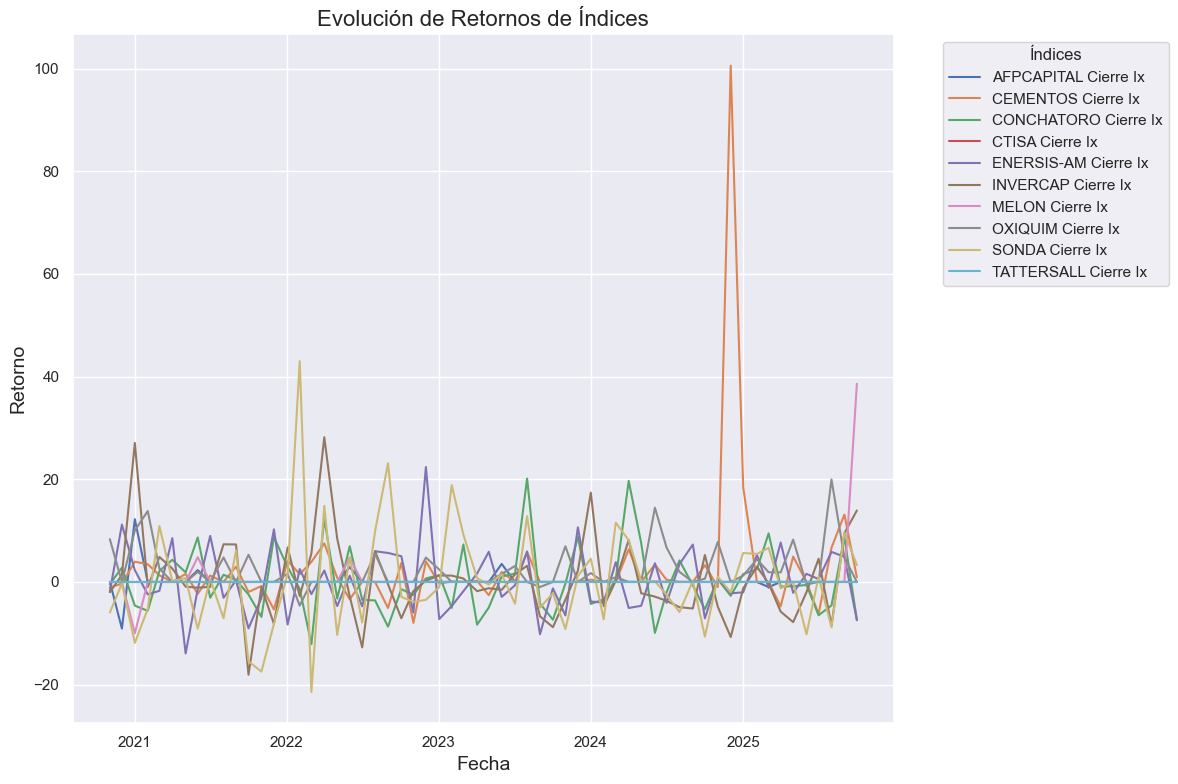

In [11]:
# Graficar la evolución de precios para todos los índices
plt.figure(figsize=(12, 8))

# Graficar todas las columnas (activos)
for column in df_r.columns:
    plt.plot(df_r.index, df_r[column], label=column)

# Añadir título y etiquetas
plt.title('Evolución de Retornos de Índices', fontsize=16)
plt.xlabel('Fecha', fontsize=14)
plt.ylabel('Retorno', fontsize=14)
plt.grid(True)
plt.legend(title='Índices', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

## Calcular la media y la matriz de varianza-covarianza

Con los datos de series temporales de las acciones disponibles, utilizamos las funciones mean y cov de Pandas para calcular los rendimientos promedio y su matriz de varianza-covarianza.

In [20]:
mu = df_r.mean()
sigma = df_r.cov()

In [13]:
mu

AFPCAPITAL Cierre Ix    0.180531
CEMENTOS Cierre Ix      2.725361
CONCHATORO Cierre Ix    0.158847
CTISA Cierre Ix         0.000000
ENERSIS-AM Cierre Ix    0.230292
INVERCAP Cierre Ix      0.479261
MELON Cierre Ix         0.638690
OXIQUIM Cierre Ix       2.387393
SONDA Cierre Ix         0.270434
TATTERSALL Cierre Ix    0.000000
dtype: float64

In [14]:
sigma

,AFPCAPITAL Cierre Ix,CEMENTOS Cierre Ix,CONCHATORO Cierre Ix,CTISA Cierre Ix,ENERSIS-AM Cierre Ix,INVERCAP Cierre Ix,MELON Cierre Ix,OXIQUIM Cierre Ix,SONDA Cierre Ix,TATTERSALL Cierre Ix
AFPCAPITAL Cierre Ix,4.355336,0.229987,-0.830935,0.0,-1.440471,5.047451,-1.767706,1.770014,-2.604613,0.0
CEMENTOS Cierre Ix,0.229987,181.828132,0.807445,0.0,-3.916198,-9.704349,-2.305057,-0.079329,1.253953,0.0
CONCHATORO Cierre Ix,-0.830935,0.807445,41.304008,0.0,6.001416,8.336515,-2.896578,-5.234319,17.516771,0.0
CTISA Cierre Ix,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
ENERSIS-AM Cierre Ix,-1.440471,-3.916198,6.001416,0.0,39.552344,0.628360,-5.426987,1.882936,11.010315,0.0
INVERCAP Cierre Ix,5.047451,-9.704349,8.336515,0.0,0.628360,63.652663,3.887117,-1.683408,16.124316,0.0
MELON Cierre Ix,-1.767706,-2.305057,-2.896578,0.0,-5.426987,3.887117,27.323931,-3.049832,3.618337,0.0
OXIQUIM Cierre Ix,1.770014,-0.079329,-5.234319,0.0,1.882936,-1.683408,-3.049832,18.047747,-11.970810,0.0
SONDA Cierre Ix,-2.604613,1.253953,17.516771,0.0,11.010315,16.124316,3.618337,-11.970810,102.758350,0.0
TATTERSALL Cierre Ix,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


Para uso futuro, guardamos los datos como archivos pickle de Python.

## Filtrar Índices con Problemas

Los índices TATTERSALL y CTISA tienen desviación estándar de cero, lo que indica que los datos fueron recopilados incorrectamente. Los eliminaremos antes de guardar los datos para el análisis.

In [21]:
# Verificar la desviación estándar de cada índice
print("Desviación estándar de cada índice:")
print(np.sqrt(np.diag(sigma)))
print("\n")

# Eliminar TATTERSALL y CTISA de mu y sigma
indices_a_eliminar = ['TATTERSALL Cierre Ix', 'CTISA Cierre Ix']

print(f"Eliminando índices: {indices_a_eliminar}")
mu = mu.drop(indices_a_eliminar)
sigma = sigma.drop(indices_a_eliminar, axis=0).drop(indices_a_eliminar, axis=1)

print(f"\nÍndices restantes ({len(mu)}): {list(mu.index)}")

Desviación estándar de cada índice:
[ 2.08694416 13.4843662   6.42681947  0.          6.28906546  7.97826192
  5.22722977  4.24826397 10.13697934  0.        ]


Eliminando índices: ['TATTERSALL Cierre Ix', 'CTISA Cierre Ix']

Índices restantes (8): ['AFPCAPITAL Cierre Ix', 'CEMENTOS Cierre Ix', 'CONCHATORO Cierre Ix', 'ENERSIS-AM Cierre Ix', 'INVERCAP Cierre Ix', 'MELON Cierre Ix', 'OXIQUIM Cierre Ix', 'SONDA Cierre Ix']


In [22]:
mu.to_pickle("mu.pkl")
sigma.to_pickle("sigma.pkl")